## PERTEMUAN 6: NAIVE BAYES 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import mglearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

### Read data

In [2]:
df = pd.read_csv("../Data/seeds.csv")
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### Describe dataset

In [3]:
df.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [4]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


### Data preparation

#### Missing value

In [5]:
df.isna().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

#### Feature Selection

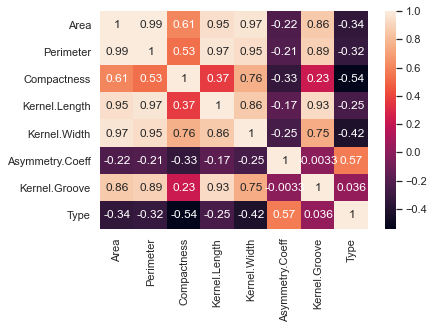

In [6]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [7]:
del df['Asymmetry.Coeff']
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,5.175,1


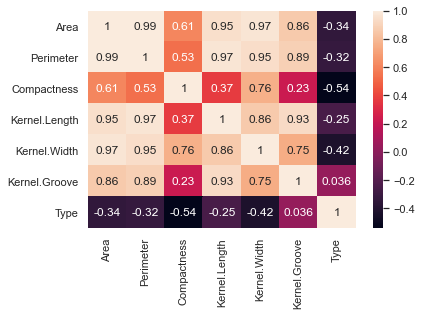

In [8]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Modelling: Naive Bayes

#### Split feature & label

In [9]:
y = df['Type']
X = df.drop(columns='Type')

X.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,5.220
1,14.88,14.57,0.8811,5.554,3.333,4.956
2,14.29,14.09,0.9050,5.291,3.337,4.825
3,13.84,13.94,0.8955,5.324,3.379,4.805
4,16.14,14.99,0.9034,5.658,3.562,5.175


#### Split training & testing

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    train_size = 0.7)

In [11]:
print("Jumlah baris: " + str(len(X)))
print("Jumlah train: " + str(len(X_train)))
print("Jumlah test: " + str(len(X_test)))

Jumlah baris: 199
Jumlah train: 139
Jumlah test: 60


#### Scatter plot

X.shape: (199, 6)


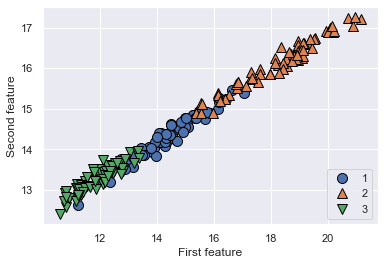

In [12]:
mglearn.discrete_scatter(X['Area'], X['Perimeter'], y)
plt.legend(["1", "2", "3"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

X.shape: (199, 6)


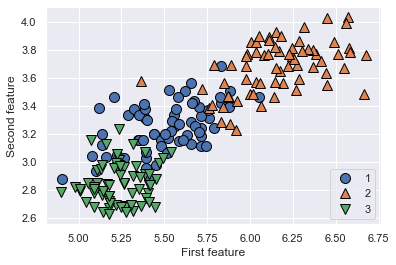

In [13]:
mglearn.discrete_scatter(X['Kernel.Length'], X['Kernel.Width'], y)
plt.legend(["1", "2", "3"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

#### Naive Bayes

In [14]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

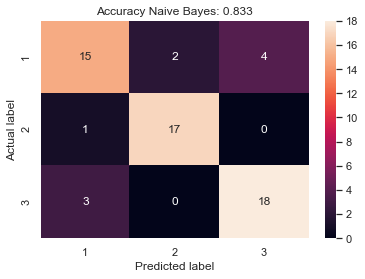

In [15]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, Y_pred)
# Transform to df for easier plotting
conf_seeds = pd.DataFrame(conf,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

sns.heatmap(conf_seeds, annot=True)
plt.title('Accuracy Naive Bayes: {0:.3f}'.format(accuracy_score(y_test,Y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')

print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

accuracy_Naive Bayes: 0.833
precision_Naive Bayes: 0.833
recall_Naive Bayes: 0.833
f1-score_Naive Bayes : 0.833


## PERTEMUAN 6: SVM

### Import Library

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

### Dataset

In [18]:
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,5.175,1


### Scatter Plot

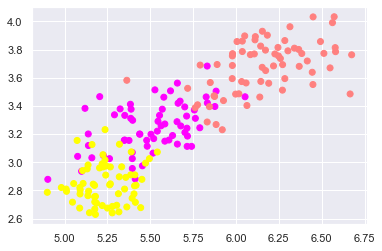

In [19]:
plt.scatter(X['Kernel.Length'], X['Kernel.Width'], c = y, cmap='spring')

### Modelling: SVM

#### Modelling

In [20]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(X_train, y_train)

SVC(C=10000000000.0, kernel='linear')

In [21]:
y_pred = model.predict(X_test)
y_pred

array([3, 3, 2, 2, 3, 3, 1, 3, 1, 3, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 1, 2,
       3, 1, 1, 2, 2, 3, 2, 3, 2, 2, 3, 1, 1, 2, 1, 1], dtype=int64)

#### Evaluasi & Akurasi

In [22]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


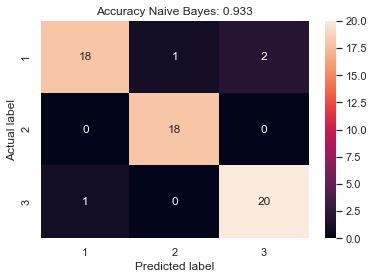

In [23]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
conf_seeds = pd.DataFrame(conf,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])

sns.heatmap(conf_seeds, annot=True)
plt.title('Accuracy Naive Bayes: {0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()